[目录](./table_of_contents.ipynb)

# 概率，高斯和贝叶斯定理

In [41]:
%matplotlib inline

In [42]:
#format the book
import book_format
book_format.set_style()

## 概述

上一章讨论了离散贝叶斯滤波器的一些缺点。对于许多跟踪和过滤问题，我们希望有一个*单峰*和*连续*的过滤器。也就是说，我们希望使用浮点数学(连续的)建模我们的系统，并且只表示一个信念(单峰的)。例如，我们想说一架飞机位于(12.34，-95.54,2389.5)的纬度、经度和高度。我们不想让过滤器告诉我们“它可能在(1.65，-78.01,2100.45)或它可能在(34.36，-98.23,2543.79)。”这与我们对世界如何运作的物理直觉不符，正如我们讨论过的，计算多模态情况的代价可能会非常高。而且，多重位置估计使得导航变得不可能。

我们希望用一种单峰的、连续的方式来表示模拟现实世界如何工作的概率，并且计算效率高。高斯分布提供了所有这些特性。

## 均值、方差和标准差

你们大多数人都接触过统计学，但请允许我介绍一下这部分内容。我要求你阅读材料，即使你确定你很了解它。我这样要求有两个原因。首先，我想确定我们使用的术语是相同的。其次，我努力形成对统计的直观理解，这将在后面的章节中很好地帮助你们。学习统计学课程很容易只记住公式和计算，可能对所学内容的含义感到模糊。
### 随机变量
 
每次掷骰子，结果将介于1到6之间。如果我们掷一个骰子一百万次，我们期望得到1/6的概率。因此，结果1的*概率*是1/6。同样地，如果我问你下一次掷出1的概率，你会回答1/6。

这种值和相关概率的组合称为[*随机变量*](https://en.wikipedia.org/wiki/Random_variable)。在这里，“随机”并不意味着过程是不确定性的，只是我们缺乏关于结果的信息。掷骰子的结果是确定的，但我们缺乏足够的信息来计算结果。我们不知道将会发生什么，除了概率以外。

当我们定义术语时，值的范围称为[*sample space*](https://en.wikipedia.org/wiki/Sample_space)。对于骰子，样本空间为{1,2,3,4,5,6}。对于一枚硬币，样本空间是{H, T}。空间是一个数学术语，意思是一个具有结构的集合。骰子的样本空间是1到6范围内的自然数的子集。

另一个随机变量的例子是大学里学生的身高。这里的样本空间是在生物学定义的两个极限之间的实数值的范围。

掷硬币和掷骰子等随机变量是*离散随机变量*。这意味着它们的样本空间由有限数量的值或可数的无限数量的值(如自然数)表示。人类的身高被称为“连续随机变量”，因为它们可以在两个极限之间取任何实际值。

不要将随机变量的“测量值”与实际值混淆。如果我们只能测量一个人的身高到0.1米，那么我们只能记录0.1、0.2、0.3……2.7之间的数值，从而产生27个离散的选择。尽管如此，一个人的身高可以在这些范围内的任意实值之间变化，所以身高是一个连续的随机变量。

在统计学中，随机变量用大写字母，通常来自字母表的后半部分。所以，我们可以说$X$是表示掷骰子的随机变量，或者$Y$是新生诗歌课上学生的身高。后面的章节将使用线性代数来解决这些问题，因此我们将遵循向量用小写表示，矩阵用大写表示的惯例。不幸的是，这些约定相互冲突，您必须根据上下文确定作者使用的是哪一个。我总是用粗体符号表示向量和矩阵，这有助于区分两者。

## 概率分布

[*概率分布*](https://en.wikipedia.org/wiki/Probability_distribution)给出了随机变量在样本空间中取任意值的概率。例如，对于一个骰子，我们可能会说:

|值|概率|
|-----|-----------|
|1|1/6|
|2|1/6|
|3|1/6|
|4|1/6|
|5|1/6|
|6|1/6|

我们用小写p表示这个分布:$p(x)$。使用普通函数表示法，我们可以这样写: 

$$P(X{=}4) = p(4) = \frac{1}{6}$$
 
这表明，骰子落在4点的概率为$\frac{1}{6}$。$P(X{=}x_k)$表示“$X$为$x_k$的概率”。注意微妙的符号差异。大写$P$表示单个事件的概率，小写$P$表示概率分布函数。如果你不善于观察，就会误入歧途。有些文本使用$Pr$而不是$P$来改善这一点。

Another example is a fair coin. It has the sample space {H, T}. The coin is fair, so the probability for heads (H) is 50%, and the probability for tails (T) is 50%. We write this as
另一个例子是均匀硬币。它有样本空间{H, T}。硬币是均匀的，正面(H)的概率是50%反面(T)的概率是50%我们把它写成

$$\begin{gathered}P(X{=}H) = 0.5\\P(X{=}T)=0.5\end{gathered}$$

样本空间不是唯一的。一个骰子样本空间是{1,2,3,4,5,6}。另一个有效的样本空间是{偶数，奇数}。另一种可能是{所有角上都是点，而不是所有角上都是点}。一个样本空间是有效的，只要它涵盖了所有的可能性，并且任何单个事件只能由一个元素来描述。{even, 1,3,4,5}不是骰子的有效样本空间，因为值为4的骰子会同时被'even'和'4'匹配。

一个*离散随机值*的所有值的概率称为*离散概率分布*，一个*连续随机值*的所有值的概率称为*连续概率分布*。

要成为一个概率分布，每个值$x_i$的概率必须是$x_i \ge 0$，因为没有概率可以小于零。其次，所有值的概率之和必须等于1。这对于抛硬币来说应该是很直观的:如果得到正面的概率是70%，那么得到反面的概率一定是30%。我们将这个要求公式化为

$$\sum\limits_u P(X{=}u)= 1$$

for discrete distributions, and as 

$$\int\limits_u P(X{=}u) \,du= 1$$

连续分布。

在前一章中，我们使用概率分布来估计狗在走廊中的位置。例如:

sum =  1.0


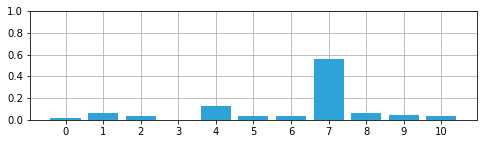

In [43]:
import numpy as np
import kf_book.book_plots as book_plots

belief = np.array([1, 4, 2, 0, 8, 2, 2, 35, 4, 3, 2])
belief = belief / np.sum(belief)
with book_plots.figsize(y=2):
    book_plots.bar_plot(belief)
print('sum = ', np.sum(belief))

每个位置的概率都在0到1之间，所有位置的和都是1，这是一个概率分布。每个概率都是离散的，所以我们可以更准确地称之为离散概率分布。在实践中，我们省略了离散和连续这两个术语，除非我们有特殊的理由来区分它们。

### 随机变量的平均数、中位数和模态


给定一组数据，我们通常想知道该数据集的代表性值或平均值。对此有很多方法，这个概念被称为[*集中趋势的方法*](https://en.wikipedia.org/wiki/Central_tendency)。例如，我们可能想知道班上学生的平均身高。我们都知道如何求一组数据的平均值，但是让我详细说明一下，以便引入更正式的符号和术语。*average*的另一个词是*mean*。我们计算平均值的方法是把这些值加起来，然后除以这些值的个数。如果学生的高度以米为单位

$$X = \{1.8, 2.0, 1.7, 1.9, 1.6\}$$

我们计算均值为

$$\mu = \frac{1.8 + 2.0 + 1.7 + 1.9 + 1.6}{5} = 1.8$$

传统上用符号$\mu$ (mu)表示平均值。

我们可以用这个方程把这个计算形式化

$$ \mu = \frac{1}{n}\sum^n_{i=1} x_i$$

NumPy提供' NumPy .mean() 来计算平均值。

In [44]:
x = [1.8, 2.0, 1.7, 1.9, 1.6]
np.mean(x)

1.8

作为一种便利，NumPy数组提供了该方法 `mean()`.

In [45]:
x = np.array([1.8, 2.0, 1.7, 1.9, 1.6])
x.mean()

1.8

一组数字的*mode*是最常出现的数字。如果只有一个数字最常出现，我们说它是一个*单峰*集合，如果两个或更多的数字以相同的频率出现最多，则该集合是*多峰*。例如集合{1,2,2,2,3,4,4,4}有模态2和模态4，这是多模态，而集合{5,7,7,13}有模态7，所以它是单模态。在这本书中，我们不会以这种方式计算模态，但我们在更一般的意义上使用单模态和多模态的概念。例如，在**离散贝叶斯**一章中，我们讨论了我们认为狗的位置是一个*多模态分布*，因为我们为不同的位置分配了不同的概率。

最后，一组数字的*中值*是集合的中点，因此一半的值在中值以下，一半在中值以上。这里，上面和下面是与正在排序的集合相关的。如果集合中包含偶数个值，那么两个中间的数将被平均在一起。

Numpy提供了`numpy.median()`来计算中值。可以看到，{1.8,2.0,1.7,1.9,1.6}的中值是1.8，因为1.8是这个集合中经过排序后的第三个元素。在这种情况下，中值等于均值，但这通常不是真的。

In [46]:
np.median(x)

1.8

## 随机变量的期望值

一个随机变量的[*期望值*](https://en.wikipedia.org/wiki/Expected_value)是它的平均值，如果我们取它的无限个样本，然后把这些样本一起平均。假设有$x=[1,3,5]$，每个值都是等概率的。 我们*期望* $x$是什么 ，平均值？

它是1 3和5的平均值，当然是3。这应该是有道理的;我们期望1 3 5的数目相等，所以$(1+3+5)/3=3$显然是这个无穷样本序列的平均值。换句话说，这里的期望值是样本空间的*均值*。

现在假设每个值都有不同的发生概率。假设1有80%的概率发生，3有15%的概率发生，5只有5%的概率发生。在本例中，我们通过$x$的每个值乘以它发生的概率百分比来计算期望值，并对结果求和。对于这种情况，我们可以计算

$$\mathbb E[X] = (1)(0.8) + (3)(0.15) + (5)(0.05) = 1.5$$
 
这里我介绍了$ X $的期望值$\mathbb E[X]$的符号。一些文本使用$E(x)$。对于$x$， 1.5的值很直观，因为$x$比3或5更有可能是1,3也比5更有可能。

我们可以将它形式化，让$x_i$是$X$的$i^{th}$值，$p_i$是它发生的概率。这给了我们

$$\mathbb E[X] = \sum_{i=1}^n p_ix_i$$

一个简单的代数运算表明，如果所有的概率都相等，期望值就等于平均值:

$$\mathbb E[X] = \sum_{i=1}^n p_ix_i = \frac{1}{n}\sum_{i=1}^n x_i = \mu_x$$

如果$x$是连续的，我们把和代入一个积分，就像这样

$$\mathbb E[X] = \int_{a}^b\, xf(x) \,dx$$

其中$f(x)$是$x$的概率分布函数。我们还不会用到这个方程，但我们会在下一章用到它。

我们可以编写一些Python来模拟这个过程。这里我取了1,000,000个样本值并计算了刚刚解析计算的分布的期望值。

In [47]:
total = 0
N = 1000000
for r in np.random.rand(N):
    if r <= .80: total += 1
    elif r < .95: total += 3
    else: total += 5

total / N

1.500058

你可以看到，计算的值与解析推导的值很接近。它不是精确的，因为得到精确的值需要无限的样本容量。

### 练习

掷骰子的期望值是多少?

### 答案

每边的概率都是等的，所以每边的概率都是1/6。因此
$$\begin{aligned}
\mathbb E[X] &= 1/6\times1 + 1/6\times 2 + 1/6\times 3 + 1/6\times 4 + 1/6\times 5 + 1/6\times6 \\
&= 1/6(1+2+3+4+5+6)\\&= 3.5\end{aligned}$$

### 练习

给定均匀连续分布

$$f(x) = \frac{1}{b - a}$$

计算$a=0$和$b=20$的期望值。

### 答案
$$\begin{aligned}
\mathbb E[X] &= \int_0^{20}\, x\frac{1}{20} \,dx \\
&= \bigg[\frac{x^2}{40}\bigg]_0^{20} \\
&= 10 - 0 \\
&= 10
\end{aligned}$$

### 随机变量的方差

上面的计算告诉了我们学生的平均身高，但它并没有告诉我们想知道的一切。例如，假设我们有三个班级的学生，我们用这些高度标记$X$， $Y$和$Z$:

In [48]:
X = [1.8, 2.0, 1.7, 1.9, 1.6]
Y = [2.2, 1.5, 2.3, 1.7, 1.3]
Z = [1.8, 1.8, 1.8, 1.8, 1.8]

使用NumPy，我们可以看到每个类的平均高度是相同的。 

In [49]:
print(np.mean(X), np.mean(Y), np.mean(Z))

1.8 1.8 1.8


每个班的平均身高是1.8米，但是请注意，第二类学生的身高变化要比第一类学生大得多，而第三类学生的身高则完全没有变化。
 
平均值告诉我们一些数据，但不是全部。我们希望能够指定学生的身高之间有多少*变化*。你可以想象有很多原因。也许一个学区需要订购5000张课桌，他们想确保购买的尺寸能适应学生的身高范围。

统计学已经将测量变化的概念形式化为[*标准差*](https://en.wikipedia.org/wiki/Standard_deviation)和[*方差*](https://en.wikipedia.org/wiki/Variance)。计算方差的方程为

$$\mathit{VAR}(X) = \mathbb  E[(X - \mu)^2]$$

暂时忽略这个平方，你可以看到方差是样本空间$X$与均值$\mu:$ ($X-\mu)$的期望值。稍后我会解释平方项的用途。期望值的公式为$\mathbb E[X] = \sum\limits_{i=1}^n p_ix_i$，因此我们可以将其代入上面的方程，得到

$$\mathit{VAR}(X) = \frac{1}{n}\sum_{i=1}^n (x_i - \mu)^2$$
 
我们来计算这三个类的方差，看看得到什么值，熟悉这个概念。

$X$的均值是1.8 ($\mu_x = 1.8$)，所以我们计算

$$ 
\begin{aligned}
\mathit{VAR}(X) &=\frac{(1.8-1.8)^2 + (2-1.8)^2 + (1.7-1.8)^2 + (1.9-1.8)^2 + (1.6-1.8)^2} {5} \\
&= \frac{0 + 0.04 + 0.01 + 0.01 + 0.04}{5} \\
\mathit{VAR}(X)&= 0.02 \, m^2
\end{aligned}$$

NumPy提供了函数`var()`来计算方差:

In [50]:
print(f"{np.var(X):.2f} meters squared")

0.02 meters squared


这可能有点难以解释。高度单位是米，而方差是米的平方。因此我们有一个更常用的度量，*标准差*，定义为方差的平方根:

$$\sigma = \sqrt{\mathit{VAR}(X)}=\sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

典型的是用$\sigma$表示*标准差*，用$\sigma^2$表示*方差*。在本书的大部分内容中，我将使用$\sigma^2$来代替$\mathit{VAR}(X)$作为方差;它们象征着同样的东西。

第一堂课，我们计算标准差

$$ 
\begin{aligned}
\sigma_x &=\sqrt{\frac{(1.8-1.8)^2 + (2-1.8)^2 + (1.7-1.8)^2 + (1.9-1.8)^2 + (1.6-1.8)^2} {5}} \\
&= \sqrt{\frac{0 + 0.04 + 0.01 + 0.01 + 0.04}{5}} \\
\sigma_x&= 0.1414
\end{aligned}$$

我们可以用NumPy方法`numpy.std()`来验证这个计算，它计算的是标准偏差。'std'是标准偏差的常见缩写。

In [51]:
print(f"std {np.std(X):.4f}")
print(f"var {np.std(X)**2:.4f}")

std 0.1414
var 0.0200


And, of course, $0.1414^2 = 0.02$, which agrees with our earlier computation of the variance.
当然，$0.1414^2 = 0.02$，这与我们之前计算的方差一致。

标准差表示什么?它告诉我们高度之间的变化。“多少”不是一个数学术语。我们将能够更精确地定义它，一旦我们引入高斯的概念，在下一节。现在我要说的是68%的值都在一个标准差范围内。换句话说，我们可以得出结论，对于一个随机班级，68%的学生身高在1.66(1.8-0.1414)米到1.94(1.8+0.1414)米之间。

我们可以在图中看到:

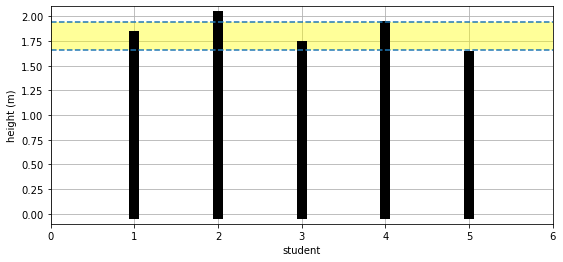

In [52]:
from kf_book.gaussian_internal import plot_height_std
import matplotlib.pyplot as plt

plot_height_std(X)

对于5个学生，显然不能在一个标准差范围内精确得到68%我们确实看到5个学生中有3个在$ pm1 σ $之内，也就是60%，这是你在只有5个样本的情况下所能得到的68%。让我们看看一个有100名学生的班级的结果。

>  We write one standard deviation as  $1\sigma$, which is pronounced "one standard deviation", not "one sigma". Two standard deviations is $2\sigma$, and so on.

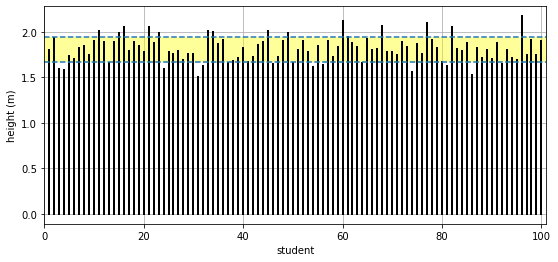

mean = 1.811
std  = 0.136


In [53]:
from numpy.random import randn
data = 1.8 + randn(100)*.1414
mean, std = data.mean(), data.std()

plot_height_std(data, lw=2)
print(f'mean = {mean:.3f}')
print(f'std  = {std:.3f}')

通过肉眼观察，大约68%的高度位于1.8平均值的$\pm1\sigma$内，但我们可以用代码验证这一点。

In [54]:
np.sum((data > mean-std) & (data < mean+std)) / len(data) * 100.

67.0

我们很快会更深入地讨论这个问题。现在我们来计算标准差

$$Y = [2.2, 1.5, 2.3, 1.7, 1.3]$$

$Y$的均值是$\mu=1.8 m，所以

$$ 
\begin{aligned}
\sigma_y &=\sqrt{\frac{(2.2-1.8)^2 + (1.5-1.8)^2 + (2.3-1.8)^2 + (1.7-1.8)^2 + (1.3-1.8)^2} {5}} \\
&= \sqrt{0.152} = 0.39 \ m
\end{aligned}$$

我们将用NumPy来验证

In [55]:
print(f'std of Y is {np.std(Y):.2f} m')

std of Y is 0.39 m


This corresponds with what we would expect. There is more variation in the heights for $Y$, and the standard deviation is larger.
这符合我们的预期。$Y$的高度变化更大，标准差也更大。

最后，让我们计算$Z$的标准差。这些值没有变化，所以我们期望标准差为零。

$$ 
\begin{aligned}
\sigma_z &=\sqrt{\frac{(1.8-1.8)^2 + (1.8-1.8)^2 + (1.8-1.8)^2 + (1.8-1.8)^2 + (1.8-1.8)^2} {5}} \\
&= \sqrt{\frac{0+0+0+0+0}{5}} \\
\sigma_z&= 0.0 \ m
\end{aligned}$$

In [56]:
print(np.std(Z))

0.0


 在我们继续之前，我需要指出的是，我忽略了男性的平均身高高于女性。一般来说，只有男性或女性的班级的身高差异要小于有两种性别的班级。其他因素也是如此。营养良好的儿童比营养不良的儿童高。斯堪的纳维亚人比意大利人高。统计学家在设计实验时需要考虑这些因素。

我建议我们可能是在为一个学区订购课桌而进行这个分析。对于每个年龄组，可能有两种不同的平均数——一种集中在女性的平均身高周围，另一种集中在男性的平均身高周围。整个班级的平均值将介于两者之间。如果我们按照所有学生的平均比例购买课桌，那么我们最终得到的课桌可能既不适合男生也不适合女生!
 
我们在本书中将不考虑这些问题。如果您需要学习处理这些问题的技术，请参阅任何标准概率文本。

### 为什么是差异的平方

为什么要取方差的差的平方?我可以做很多数学运算，但让我们用简单的方法来看一下。这是一张$X$值与$X=[3，-3,3，-3]$均值的图表

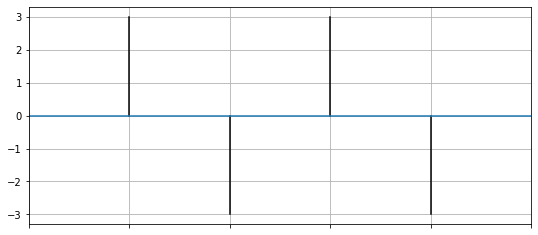

In [57]:
X = [3, -3, 3, -3]
mean = np.average(X)
for i in range(len(X)):
    plt.plot([i ,i], [mean, X[i]], color='k')
plt.axhline(mean)
plt.xlim(-1, len(X))
plt.tick_params(axis='x', labelbottom=False)

如果我们不取差的平方符号会把所有东西都消掉
$$\frac{(3-0) + (-3-0) + (3-0) + (-3-0)}{4} = 0$$
 
这显然是不正确的，因为数据中的方差大于0。

也许我们可以用绝对值?通过检验，我们可以看到结果是$12/4=3$，这当然是正确的——每个值与平均值相差3。但如果我们有$Y=[6， -2， - 3,1]$呢?在这种情况下，我们得到$12/4=3$。显然，$Y$比$X$更分散，但计算结果是相同的。如果我们使用使用平方的公式，我们得到$Y$的方差为3.5，这反映了其更大的变化。

这并不是正确的证明。事实上，这项技术的发明者卡尔·弗里德里希·高斯(Carl Friedrich Gauss)认识到，它在某种程度上是武断的。如果有异常值，那么对差异进行平方会给该术语带来不成比例的权重。例如，让我们看看如果我们有:

In [58]:
X = [1, -1, 1, -2, -1, 2, 1, 2, -1, 1, -1, 2, 1, -2, 100]
print(f'Variance of X with outlier    = {np.var(X):6.2f}')
print(f'Variance of X without outlier = {np.var(X[:-1]):6.2f}')

Variance of X with outlier    = 621.45
Variance of X without outlier =   2.03


这是“正确”吗?你告诉我。如果没有100的异常值，我们得到$\sigma^2=2.03$，这准确地反映了没有异常值时$X$的变化情况。一个离群值淹没了方差计算。我们是想要淹没计算，从而知道有一个离群值，还是稳健地合并离群值，并仍然提供一个接近于没有离群值的值的估计?再说一遍，你来告诉我。显然，这取决于你的问题。

我不会继续沿着这条路走下去;如果你感兴趣，你可能会想看看James Berger在这个问题上所做的工作，在一个叫做“贝叶斯稳健性”的领域，或者是Peter J. Huber关于“稳健性统计”的优秀出版物。在这本书中，我们总是使用高斯定义的方差和标准差。
 
从这里可以看出，这些“概要”统计数据总是在讲述我们的数据的一个不完整的故事。在这个例子中，高斯定义的方差并没有告诉我们有一个大的离群值。然而，它是一个功能强大的工具，因为我们可以用几个数字精确地描述一个大数据集。如果我们有10亿个数据点，我们就不会想要用眼睛来检查图表或查看数字列表;摘要统计给我们提供了一种有用的方法来描述数据的形状。

## 高斯函数

 
我们现在准备学习[高斯函数](https://en.wikipedia.org/wiki/Gaussian_function)。让我们提醒自己这一章的动机。
> 我们希望用一种单峰的、连续的方式来表示模拟现实世界如何工作的概率，并且计算效率高。

让我们看一下高斯分布的图来了解一下我们在讨论什么。

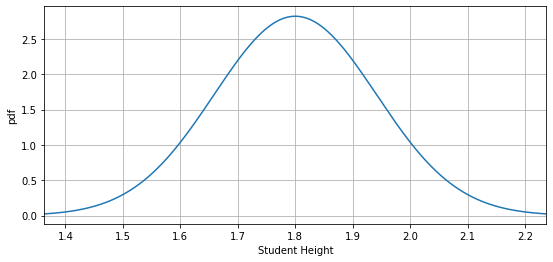

In [59]:
from filterpy.stats import plot_gaussian_pdf
plot_gaussian_pdf(mean=1.8, variance=0.1414**2, 
                  xlabel='Student Height', ylabel='pdf');

 此曲线为[*概率密度函数*](https://en.wikipedia.org/wiki/Probability_density_function)或*pdf*。它显示了随机变量取一个值的相对可能性。从图表中我们可以看出，学生的身高更有可能接近1.8米，而不是1.7米，身高更有可能是1.9米，而不是1.4米。换句话说，很多学生的身高会接近1.8米，而很少有学生的身高是1.4米或2.2米。最后，注意曲线的中心是1.8米的平均值。

> 我在Notebook * computing_and_plotting_pdf *中解释了如何绘制高斯函数，以及更多内容
Supporting_Notebooks文件夹。你可以在线阅读[这里](https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/Supporting_Notebooks/Computing_and_plotting_PDFs.ipynb)[1]。

这可能被你识别为“钟形曲线”。这条曲线是普遍存在的，因为在现实世界条件下，许多观测结果都是这样分布的。我不会用“钟形曲线”一词来指代高斯分布，因为许多概率分布都有类似的钟形曲线形状。非数学来源可能不那么精确，所以当你看到这个术语没有定义时，在你得出结论时要明智。

这条曲线并不是高度所特有的——大量的自然现象都表现出这种分布，包括我们在过滤问题中使用的传感器。正如我们将看到的，它也具有我们正在寻找的所有属性——它将单峰信念或值表示为概率，它是连续的，而且它在计算上是高效的。我们很快就会发现，它还有其他我们可能没有意识到我们所渴望的品质。

为了进一步激励你，回想一下*离散贝叶斯*一章中概率分布的形状:

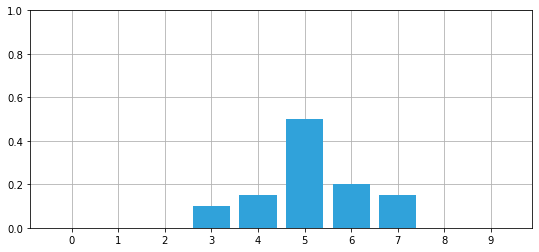

In [60]:
import kf_book.book_plots as book_plots
belief = [0., 0., 0., 0.1, 0.15, 0.5, 0.2, .15, 0, 0]
book_plots.bar_plot(belief)

它们不是完美的高斯曲线，但它们是相似的。我们将使用高斯函数来代替那一章中使用的离散概率!

## 术语

在我们继续之前，先讲一点术语——这个图表描述了一个随机变量的概率密度，该变量的值在($- infty. \infty)$之间。这是什么意思?想象一下，我们在高速公路上对汽车的速度进行无限次、无限精确的测量。然后，我们可以通过显示以任何给定速度通过的汽车的相对数量来绘制结果。如果平均速度是120公里每小时，它可能是这样的:

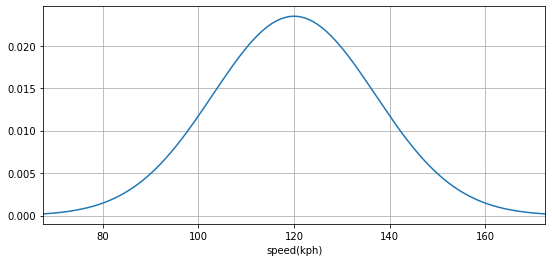

In [61]:
plot_gaussian_pdf(mean=120, variance=17**2, xlabel='speed(kph)');

y轴表示概率密度-在相应的x轴上以相应速度行驶的汽车的相对数量。我将在下一节进一步解释这一点。

高斯模型并不完善。虽然这些图表没有显示出来，但分布的“尾巴”一直延伸到无穷远。“尾”是曲线的远端，即值最低的地方。当然，人的高度或汽车的速度不能小于零，更不用说$-\infty$ or $\infty$了。“地图不是领域”是一个常见的表达，它适用于贝叶斯过滤和统计。上述高斯分布模型模拟了实测车速的分布，但作为一个模型，它必然是不完善的。在这些过滤器中，模型和现实之间的差异会一次又一次地出现。高斯函数被用于数学的许多分支，不是因为它们完美地模拟了现实，而是因为它们比其他任何相对准确的选择都更容易使用。然而，即使在这本书中，高斯函数也无法模拟现实，迫使我们使用计算上昂贵的替代方法。
 
你会听到这些分布叫做“高斯分布”或“正态分布”。在这里，“高斯”和“正态”都是同一个意思，并且可以互换使用。我将在整本书中使用这两个词，因为不同的来源会使用这两个词，我希望你们习惯看到这两个词。最后，就像在这段话中，它是典型的缩短名称和谈论一个*高斯*或*正态* -这都是*高斯分布的典型的捷径名称。

## 多高斯分布

让我们来看看高斯函数是如何工作的。高斯分布是一个*连续概率分布*，它完全由两个参数描述，均值($\mu$)和方差($\sigma^2$)。定义为:

$$ 
f(x, \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\big [{-\frac{(x-\mu)^2}{2\sigma^2} }\big ]
$$
 
$\exp[x]$表示$e^x$
  
<p> 如果你之前没见过这个等式，不要被它吓倒;你将不需要记忆或操纵它。这个函数的计算存储在`stats.py`和函数`gaussian(x, mean, var, normed=True)`中。
    
去掉常数，你可以看到它是一个简单的指数:
    
$$f(x)\propto e^{-x^2}$$


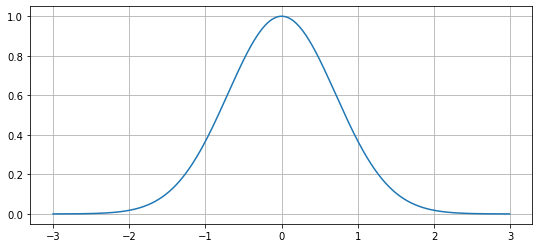

In [62]:
x = np.arange(-3, 3, .01)
plt.plot(x, np.exp(-x**2));

让我们来回顾一下如何查看函数的代码。在单元格中，键入函数名，后跟两个问号，然后按CTRL+ENTER。这将打开一个显示源代码的弹出窗口。取消注释下一个单元格，现在尝试它。

In [63]:
from filterpy.stats import gaussian
#gaussian??

让我们画一个高斯分布，均值为22 $(\mu=22)$，方差为4 $(\sigma^2=4)$。

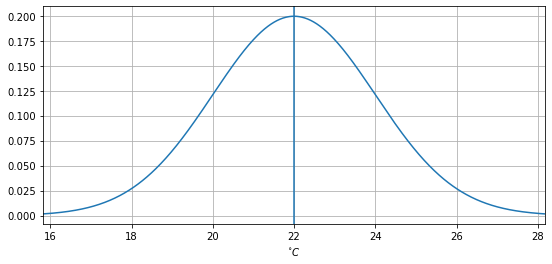

In [64]:
plot_gaussian_pdf(22, 4, mean_line=True, xlabel='$^{\circ}C$');

这条曲线是什么意思?假设我们有一个读数为22°C的温度计。没有一个温度计是完全精确的，因此我们希望每次读数都与实际值稍有偏差。然而，一个叫做[*中心极限定理*](https://en.wikipedia.org/wiki/Central_limit_theorem)的定理指出，如果我们进行许多测量，这些测量值将是正态分布的。当我们看这张图表时，我们可以看到它与温度计读数特定值的概率成正比，给定实际温度为22°C。

回想一下高斯分布是*连续的*。想象一条无限长的直线，随机选取的点在2点的概率是多少。显然是0%，因为有无数的选择可供选择。正态分布也是如此;在上图中，恰好是 2°C的概率是0%，因为读数可以取无数个值。

这条曲线是什么?我们称之为概率密度函数。曲线下任意区域的面积给出了这些值的概率。例如，如果你计算曲线下的面积在20和22之间，得到的面积就是温度读数在这两个温度之间的概率。

这是另一种理解方式。岩石或海绵的密度是多少?它是对在给定空间中压缩了多少质量的度量。岩石密度大，海绵密度小。所以，如果你想知道一块石头的重量，但没有秤，你可以用它的体积乘以它的密度。这就得到了它的质量。实际上，密度在大多数物体中都是变化的，所以你可以通过岩石的体积对局部密度进行积分。

$$M = \iiint_R p(x,y,z)\, dV$$

我们对概率密度也是这样做的。如果你想知道温度在20°C到21°C之间，你可以对上面的曲线从20到21积分。众所周知，曲线的积分是曲线下的面积。因为这是概率密度的曲线，密度的积分就是概率。

温度正好是22°C的概率是多少?直观地说,0。这些都是实数，22°C相对于22.00000000000017°C的几率是无限小的。数学上，从22到22积分会得到什么?零。

回想一下这块岩石，岩石上一个点的重量是多少?一个无限小的点一定是没有权值的。问一个点的权重是没有意义的，问一个连续分布只有一个值的概率也是没有意义的。两者的答案显然都是零。

在实践中，我们的传感器没有无限的精度，所以读数22°C意味着一个范围，例如22 $\pm$ 0.1°C，我们可以通过从21.9到22.1积分来计算该范围的概率。
 
我们可以用贝叶斯术语或频率术语来思考。作为贝叶斯，如果温度计准确读数为22°C，那么我们的信念就被曲线所描述——我们认为实际(系统)温度接近22°C是非常高的，而我们认为实际温度接近18°C是非常低的。作为一个频率主义者，我们会说，如果我们对一个系统在22°C的温度进行10亿次测量，那么测量的直方图就会像这条曲线。

你怎么计算概率，或者曲线下的面积?对高斯函数方程积分

$$ \int^{x_1}_{x_0}  \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}{(x-\mu)^2}/\sigma^2 } dx$$

这被称为*累积概率分布*，通常缩写为*cdf*。

我写的`filterpy.stats.norm_cdf` 来计算积分。例如，我们可以计算

In [65]:
from filterpy.stats import norm_cdf
print('Cumulative probability of range 21.5 to 22.5 is {:.2f}%'.format(
      norm_cdf((21.5, 22.5), 22,4)*100))
print('Cumulative probability of range 23.5 to 24.5 is {:.2f}%'.format(
      norm_cdf((23.5, 24.5), 22,4)*100))

Cumulative probability of range 21.5 to 22.5 is 19.74%
Cumulative probability of range 23.5 to 24.5 is 12.10%


平均值($\mu$)听起来就是所有可能概率的平均值。由于曲线的对称形状，它也是曲线上最高的部分。温度计上的读数是22°C，所以这是我们用来计算平均值的。
 
随机变量$X$的正态分布表示为$X \sim\ \mathcal{N}(\mu,\sigma^2)$，其中$ sim$表示根据*分布。这意味着我可以把温度计的温度读数表示为

$$\text{temp} \sim \mathcal{N}(22,4)$$
 
这是一个极其重要的结果。高斯函数允许我只用两个数就能捕获无限个可能的值!用$\mu=22$和$\sigma^2=4$，我可以计算出测量值在任何范围内的分布。

一些来源使用$\mathcal N (\mu， \sigma)$代替$\mathcal N (\mu， \sigma^2)$。两者都可以，都是惯例。如果看到$\mathcal{N}(22,4)$这样的术语，您需要记住使用的是哪种形式。在这本书中，我总是使用$ \mathcal N (\mu， \sigma^2)$，在这个例子中，$\sigma=2$， $\sigma^2=4$。

## 方差和置信度

因为这是一个概率密度分布它要求曲线下的面积总是等于1。这应该是直观清楚的-曲线下的面积代表所有可能的结果，*某件事*发生了，*某件事发生的概率是1，所以密度的总和必须是1。我们可以用一些代码来证明这一点。(如果你有数学倾向，将高斯方程从$-\inty$到$\inty$进行积分)

In [66]:
print(norm_cdf((-1e8, 1e8), mu=0, var=4))

1.0


这引出了一个重要的见解。如果方差很小，曲线就会变窄。这是因为方差衡量的是样本与均值的差异。为了使面积等于1，曲线也必须是高的。另一方面，如果方差很大，曲线会很宽，因此它也会很短，以使面积等于1。

让我们用图形来看看。我们将使用前面提到的filterpy.stats。高斯'，它可以接受单个值或数组值。

In [67]:
from filterpy.stats import gaussian

print(gaussian(x=3.0, mean=2.0, var=1))
print(gaussian(x=[3.0, 2.0], mean=2.0, var=1))

0.24197072451914337
[0.378 0.622]


默认情况下，`高斯`将输出归一化，将输出转换回概率分布。使用参数`normed`来控制它。

In [68]:
print(gaussian(x=[3.0, 2.0], mean=2.0, var=1, normed=False))

[0.242 0.399]


如果高斯函数没有归一化，它就被称为*高斯函数*而不是*高斯分布*。

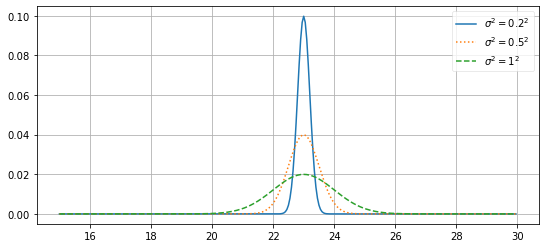

In [69]:
xs = np.arange(15, 30, 0.05)
plt.plot(xs, gaussian(xs, 23, 0.2**2), label='$\sigma^2=0.2^2$')
plt.plot(xs, gaussian(xs, 23, .5**2), label='$\sigma^2=0.5^2$', ls=':')
plt.plot(xs, gaussian(xs, 23, 1**2), label='$\sigma^2=1^2$', ls='--')
plt.legend();

这告诉我们什么?$\sigma^2=0.2^2$的高斯分布非常窄。它是说，我们相信$x=23$，并且我们非常确定:在$\pm 0.2$ std内。相反，高斯函数$\sigma^2=1^2$也相信$x=23$，但我们对此不太确定。我们认为$x=23$更低，所以我们对$x$可能值的信念是分散的——例如，我们认为$x=20$或$x=26$很有可能。$\sigma^2=0.2^2$几乎完全消除了$22$或$24$的可能值，而$\sigma^2=1^2$认为它们几乎与$23$一样有可能

如果我们回想一下温度计，我们可以把这三条曲线看作是三个不同温度计的读数。$\sigma^2=0.2^2$的曲线代表一个非常精确的温度计，而$\sigma^2=1^2$的曲线代表一个相当不精确的温度计。请注意，高斯分布给我们提供了一个非常强大的特性——我们可以只用两个数字——平均值和方差——来完全表示温度计的读数和误差。

高斯函数的等价形式是$\mathcal{N}(\mu,1/\tau)$，其中$\mu$是*平均值* ，$\tau$是*精度* 。$1/\tau = \sigma^2$;它是方差的倒数。虽然我们在本书中没有使用这个公式，但它强调了方差是衡量我们的数据有多精确的一个指标。一个小的方差产生大的精度-我们的测量是非常精确的。相反，大的差异产生低的精度-我们的信念散布在一个大的区域。你们应该习惯于用这些等价形式来考虑高斯函数。在贝叶斯术语中，高斯函数反映了我们对测量的“信念”，它们表达了测量的“精度”，并表达了测量中有多少“方差”。这些都是表述同一个事实的不同方式。

我讲得有点超前了，但在接下来的章节中，我们将使用高斯函数来表达我们对一些事情的信念，比如我们跟踪的物体的估计位置，或者我们使用的传感器的精度。

## 68 - 95 - 99.7规则

现在值得在标准差上花几句话。标准偏差是衡量数据偏离均值的程度。对于高斯分布，68%的数据落在均值的一个标准差内($\pm1\sigma$)， 95%落在两个标准差内($\pm2\sigma$)， 99.7%落在三个标准差内($\pm3\sigma$)。这通常被称为[68-95-99.7规则](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule)。如果你被告知一个班级的平均考试成绩是71分，标准差是9.4，你可以得出结论，95%的学生的成绩在52.2到89.8之间，如果分布是正态分布(这是用$71 \pm(2 * 9.4)$计算的)。

最后，这些不是任意的数字。如果我们位置的高斯分布是$\mu=22$米，那么标准差也有单位米。因此$\sigma=0.2$意味着68%的测量范围从21.8米到22.2米。方差是标准差的平方，因此$\sigma^2 = 0.04 $米$^2$。正如你在上一节看到的，写$\sigma^2 = 0.2^2$会让这个更有意义，因为0.2和数据是相同的单位。

下图描述了标准差和正态分布之间的关系。

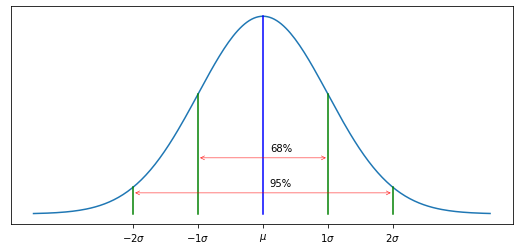

In [70]:
from kf_book.gaussian_internal import display_stddev_plot
display_stddev_plot()

## 交互式高斯函数

对于那些在Jupyter Notebook中阅读这篇文章的人，这里有一个交互版本的高斯图。使用滑块修改$\mu$和$\sigma^2$。调整$\mu$将使图形向左或向右移动，因为你是在调整均值，而调整$\sigma^2$将使钟形曲线变厚或变薄。

In [72]:
import math
from ipywidgets import interact, FloatSlider

def plt_g(mu,variance):
    plt.figure()
    xs = np.arange(2, 8, 0.01)
    ys = gaussian(xs, mu, variance)
    plt.plot(xs, ys)
    plt.ylim(0, 0.04)

interact(plt_g, mu=FloatSlider(value=5, min=3, max=7),
         variance=FloatSlider(value = .03, min=.01, max=1.));

interactive(children=(FloatSlider(value=5.0, description='mu', max=7.0, min=3.0), FloatSlider(value=0.03, desc…

最后，如果你在网上阅读这篇文章，这是一个高斯函数的动画。首先，均值向右平移。然后均值集中在$\mu=5$，方差被修改。

<img src='animations/04_gaussian_animate.gif'>

## 高斯的计算性质
 
离散贝叶斯滤波器的工作原理是乘加任意概率分布。卡尔曼滤波器使用高斯分布而不是任意分布，但算法的其余部分保持不变。这意味着我们需要将高斯函数相乘和相加。

高斯函数的一个显著性质是两个独立的正态变量(https://en.wikipedia.org/wiki/Sum_of_normally_distributed_random_variables)的和也是正态分布的!乘积不是高斯函数，而是正比于高斯函数。在这里，我们可以说，两个高斯分布相乘的结果是一个高斯函数(回忆函数在这里的意思是，值和为1的属性是不保证的)。

在我们计算之前，让我们直观地测试一下。

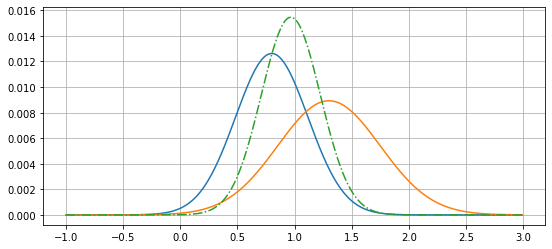

In [73]:
x = np.arange(-1, 3, 0.01)
g1 = gaussian(x, mean=0.8, var=.1)
g2 = gaussian(x, mean=1.3, var=.2)
plt.plot(x, g1, x, g2)

g = g1 * g2  # element-wise multiplication
g = g / sum(g)  # normalize
plt.plot(x, g, ls='-.');

在这里我创建了两个高斯函数，g1=$\mathcal N(0.8, 0.1)$和g2=$\mathcal N(1.3, 0.2)$并绘制它们。然后我将它们相乘，并将结果归一化。如你所见，结果看起来像一个高斯分布。

高斯函数是非线性函数。一般来说，如果你把一个非线性方程乘起来你会得到一个不同类型的函数。例如，`sin(x)`的形状非常不同。

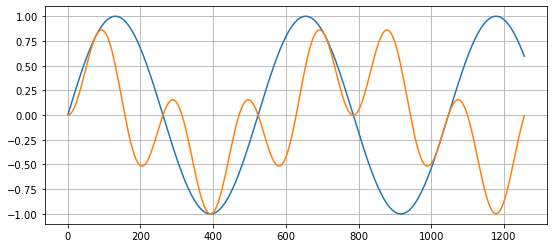

In [74]:
x = np.arange(0, 4*np.pi, 0.01)
plt.plot(np.sin(1.2*x))
plt.plot(np.sin(1.2*x) * np.sin(2*x));

 但是两个高斯分布相乘的结果是一个高斯函数。这是卡尔曼滤波器在计算上可行的一个关键原因。换句话说，卡尔曼滤波器使用高斯滤波器，因为它们在计算上很好。

两个独立高斯函数的乘积由:

$$\begin{aligned}\mu &=\frac{\sigma_1^2\mu_2 + \sigma_2^2\mu_1}{\sigma_1^2+\sigma_2^2}\\
\sigma^2 &=\frac{\sigma_1^2\sigma_2^2}{\sigma_1^2+\sigma_2^2} 
\end{aligned}$$

两个高斯函数的和由

$$\begin{gathered}\mu = \mu_1 + \mu_2 \\
\sigma^2 = \sigma^2_1 + \sigma^2_2
\end{gathered}$$

在本章的最后，我推导了这些方程。然而，理解推导过程并不是很重要。

## 将所有的东西放在一起

现在我们准备讨论高斯函数如何用于滤波。在下一章中，我们将使用高斯函数实现一个滤波器。在这里我将解释为什么我们要使用高斯函数。

在前一章中，我们用数组表示概率分布。我们通过计算该分布与代表每个点测量可能性的另一个分布的元素乘积来执行更新计算，如下所示:

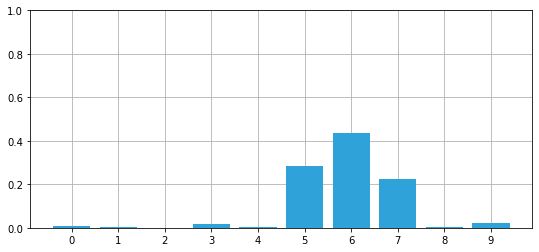

In [75]:
def normalize(p):
    return p / sum(p)

def update(likelihood, prior):
    return normalize(likelihood * prior)

prior =      normalize(np.array([4, 2, 0, 7, 2, 12, 35, 20, 3, 2]))
likelihood = normalize(np.array([3, 4, 1, 4, 2, 38, 20, 18, 1, 16]))
posterior = update(likelihood, prior)
book_plots.bar_plot(posterior)

 
换句话说，我们要做10次乘法才能得到这个结果。对于一个具有多维大数组的真正过滤器，我们需要数十亿次乘法运算和大量内存。
 
但是这个分布看起来像高斯分布。如果我们用高斯函数代替数组呢?我将计算后验均值和方差并将其与柱状图对比

mean: 5.88 var: 1.24


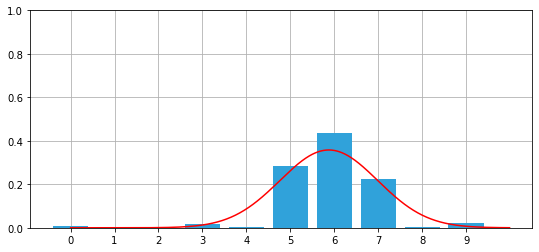

In [76]:
xs = np.arange(0, 10, .01)

def mean_var(p):
    x = np.arange(len(p))
    mean = np.sum(p * x,dtype=float)
    var = np.sum((x - mean)**2 * p)
    return mean, var

mean, var = mean_var(posterior)
book_plots.bar_plot(posterior)
plt.plot(xs, gaussian(xs, mean, var, normed=False), c='r');
print('mean: %.2f' % mean, 'var: %.2f' % var)

这是令人印象深刻。我们可以用两个数来描述整个数的分布。也许这个例子并不具有说服力，因为分布中只有10个数字。但一个真正的问题可能有数百万个数字，但仍然只需要两个数字来描述它。

接下来，回想一下我们的过滤器实现的更新函数
```python
def update(likelihood, prior):
    return normalize(likelihood * prior)
```

如果数组包含一百万个元素，那就是一百万次乘法运算。但是，如果我们用高斯函数替换数组我们就会用

$$\begin{aligned}\mu &=\frac{\sigma_1^2\mu_2 + \sigma_2^2\mu_1}{\sigma_1^2+\sigma_2^2}\\
\sigma^2 &=\frac{\sigma_1^2\sigma_2^2}{\sigma_1^2+\sigma_2^2} 
\end{aligned}$$

也就是三个乘法和两个除法。

### 贝叶斯定理
 
在上一章中，我们开发了一个算法，通过对我们在每一时刻所拥有的信息进行推理，我们将这些信息表示为离散概率分布。在这个过程中，我们发现了[*贝叶斯定理*](https://en.wikipedia.org/wiki/Bayes%27_theorem)。贝叶斯定理告诉我们如何计算给定先验信息的事件的概率。

我们用这个概率计算实现了`update()`函数:

$$ \mathtt{posterior} = \frac{\mathtt{likelihood}\times \mathtt{prior}}{\mathtt{normalization}}$$ 
 
这就是贝叶斯定理。等一下，我将发展数学，但在许多方面，这模糊了这个简单的概念，在这个方程中表达。我们把它理解为:

$$ updated\,knowledge = \big\|likelihood\,of\,new\,knowledge\times prior\, knowledge \big\|$$

其中$\| \cdot\|$表示规范化的术语。

我们得出这个结论的原因很简单:一只狗在走廊里走。然而，正如我们将看到的，同样的等式适用于一系列过滤问题。我们将在以后的每一章中使用这个方程。
 
回顾一下，“先验”是在我们包含测量的概率之前发生的概率(“可能性”)，而“后验”是我们在包含测量的信息之后计算的概率。
贝叶斯定理

$$P(A \mid B) = \frac{P(B \mid A)\, P(A)}{P(B)}$$

$P(A \mid B)$被称为[*条件概率*](https://en.wikipedia.org/wiki/Conditional_probability)。也就是说，它表示如果$B发生后$A$发生的概率。例如，如果昨天也下雨，那么今天更有可能下雨，因为降雨系统通常会持续一天以上。我们把昨天下雨的情况下今天下雨的概率写成$P$(今天下雨$\mid$昨天下雨)。

我忽略了重要的一点。在上面的代码中，我们不是在处理单个概率，而是一个概率数组——一个*概率分布*。我刚才给出的贝叶斯方程使用了概率，而不是概率分布。然而，它同样适用于概率分布。我们用小写$p$表示概率分布

$$p(A \mid B) = \frac{p(B \mid A)\, p(A)}{p(B)}$$
 
在上面的等式中$B$是*evidence*，$p(A)$是*先验*，$p(B \mid A)$是*可能性*，$p(A \mid B)$是*后验*。通过用相应的词替换数学术语，你可以看到贝叶斯定理与我们的更新方程相匹配。我们把这个方程写成问题的形式。我们将使用$x_i$表示*i*处的位置，$z$表示测量值。因此，我们想知道$P(x_i \mid z)$，也就是说，在给定测量$z$的情况下，狗到达$x_i$的概率。

把它代入方程，解出来。

$$p(x_i \mid z) = \frac{p(z \mid x_i) p(x_i)}{p(z)}$$

那看起来很难看，但实际上很简单。我们来看看右边的每一项是什么意思。首先是$p(z \mid x_i)$。这是在每个单元$x_i$处测量的概率。$p(x_i)$是*先验* -我们在纳入测量之前的信念。我们把它们相乘。这只是' update() '函数中未规范化的乘法:

```python
def update(likelihood, prior):
    posterior = prior * likelihood   # p(z|x) * p(x)
    return normalize(posterior)
```
最后一项要考虑的是分母$p(z)$。这是在不考虑位置的情况下获得度量值$z$的概率。它通常被称为“evidence”。我们通过在代码中取$x$的总和或`sum(belief)`来计算。这就是我们计算标准化的方法!因此，`update()`函数只是计算贝叶斯定理。

文献中经常以积分的形式给出这些方程。毕竟，积分就是对连续函数的求和。你可能会看到贝叶斯定理写成

$$p(A \mid B) = \frac{p(B \mid A)\, p(A)}{\int p(B \mid A_j) p(A_j) \,\, \mathtt{d}A_j}\cdot$$

这个分母通常是不可能分析解决的;当它能解出来的时候，数学就变得极其困难。最近的一篇评论文章(http://www.statslife.org.uk/opinion/2405-we-need-to-rethink-how-we-teach-statistics-from-the-ground-up)for皇家统计学会称其为“狗的早餐”[8]。采用贝叶斯方法的过滤教科书充斥着没有解析解的积分方程。不要被这些方程所吓倒，因为我们通过对后验进行标准化来处理这个积分。我们将学习更多的技术来处理这在**粒子过滤器**章。在那之前，认识到在实践中它只是一个可以求和的标准化项。我想说的是，当你面对一页的积分时，只要把它们看作是和，并把它们与本章联系起来，通常困难就会消失。问问你自己"为什么我们要把这些值加起来" "为什么要除以这一项"。令人惊讶的是，答案往往是显而易见的。令人惊讶的是，作者常常忽略了这一解释。

很有可能贝叶斯定理的威力还没有完全显现出来。我们想要计算$p(x_i \mid Z)$。也就是说，在第i步，我们给出测量值的可能状态是什么。总的来说，这是一个非常困难的问题。贝叶斯定理是普遍的。我们可能想知道根据癌症测试的结果，我们患癌症的概率，或者根据不同传感器的读数，下雨的概率。说得好像这些问题是无法解决的。
 
但是贝叶斯定理让我们用逆$p(Z\mid x_i)$来计算它，这通常很简单

$$p(x_i \mid Z) \propto p(Z\mid x_i)\, p(x_i)$$
  
也就是说，要计算给定特定传感器读数的下雨可能性，我们只需要计算给定下雨的传感器读数的可能性!这是一个***容易得多***的问题!天气预报仍然是一个困难的问题，但贝叶斯让它变得容易处理。
 
同样地，正如你在离散贝叶斯那一章中所看到的，我们通过计算传感器读数显示Simon处于“x”位置的可能性，来计算Simon在走廊中任何给定位置的可能性。困难的问题变得容易了。

### 总概率定理

现在我们知道了`update()`函数背后的数学形式;那么‘`predict()`函数呢?`predict()`实现了[*总概率定理*](https://en.wikipedia.org/wiki/Law_of_total_probability)。让我们回顾一下`predict()`计算的内容。它根据所有可能的运动事件的概率计算出在任何给定位置的概率。我们把它表示成一个方程。在时间$t$的任意位置$i$的概率可以写成$P(X_i^t)$。我们计算出$t-1时刻$ $P(X_j^{t-1})$乘以从单元格$ X_j $移动到$x_i$的概率。这是

$$P(X_i^t) = \sum_j P(X_j^{t-1})  P(x_i | x_j)$$

这个方程叫做*总概率论*。引用维基百科[6]“它表达了一个结果可以通过几个不同事件实现的总概率”。我本可以给你那个等式并执行`predict()`，但你理解这个等式为何有效的机会很小。作为提醒，这里是计算这个方程的代码

```python
for i in range(N):
    for k in range (kN):
        index = (i + (width-k) - offset) % N
        result[i] += prob_dist[index] * kernel[k]
```

## 用scipy.stats计算概率

在本章中，我使用了来自[FilterPy](https://github.com/rlabbe/filterpy)的代码来计算和绘制高斯函数。我这样做是为了让您有机会查看代码，并了解这些函数是如何实现的。然而，正如俗话所说，Python自带了“batteries included”，并且在模块' scipy.stats '中自带了广泛的统计函数。让我们来看看如何使用scipy。用来计算统计数据和概率。

`scipy.stats`模块包含许多对象，你可以使用这些对象来计算各种概率分布的属性。这个模块的完整文档在这里:http://docs.scipy.org/doc/scipy/reference/stats.html 。我们将重点关注norm变量，它实现了正态分布。让我们看看一些使用`scipy.stats`的代码。norm 来计算高斯函数，并将其值与FilterPy的`gaussian()`函数返回的值进行比较。

In [77]:
from scipy.stats import norm
import filterpy.stats
print(norm(2, 3).pdf(1.5))
print(filterpy.stats.gaussian(x=1.5, mean=2, var=3*3))

0.13114657203397997
0.13114657203397995


调用`norm(2, 3)`创建了scipy所谓的“冻结”分布——它创建并返回一个平均值为2、标准差为3的对象。然后你可以多次使用这个对象来获得不同值的概率密度，如下所示:

In [78]:
n23 = norm(2, 3)
print('pdf of 1.5 is       %.4f' % n23.pdf(1.5))
print('pdf of 2.5 is also  %.4f' % n23.pdf(2.5))
print('pdf of 2 is         %.4f' % n23.pdf(2))

pdf of 1.5 is       0.1311
pdf of 2.5 is also  0.1311
pdf of 2 is         0.1330


[2]的文档[scipy.stats.norm](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.normfor)列出了许多其他函数。例如，我们可以使用`rvs()`函数从分布中生成$n$ samples。

In [79]:
np.set_printoptions(precision=3, linewidth=50)
print(n23.rvs(size=15))

[ 1.02  -0.766  2.439  8.039  1.033  0.592 -1.492
  3.568  4.615  6.621  4.631 -2.079  4.212  3.326
  0.766]


我们可以得到[*累积分布函数(CDF)*](https://en.wikipedia.org/wiki/Cumulative_distribution_function)，这是分布中随机抽取的值小于或等于$x$的概率。

In [80]:
# probability that a random value is less than the mean 2
print(n23.cdf(2))

0.5


我们可以得到分布的各种性质:

In [81]:
print('variance is', n23.var())
print('standard deviation is', n23.std())
print('mean is', n23.mean())

variance is 9.0
standard deviation is 3.0
mean is 2.0


## 使用高斯模型来模拟世界的局限性

前面我提到了*中心极限定理*，该定理指出，在一定条件下，任何独立随机变量的算术和都是正态分布的，不管随机变量是如何分布的。这对我们很重要，因为自然界充满了非正态分布，但当我们把中心极限定理应用到大的总体上时，我们最终得到的是正态分布。

然而，证明的关键部分是“在一定条件下”。这些条件通常并不适用于物质世界。例如，厨房秤的读数不能低于0，但如果我们将测量误差表示为高斯分布，曲线的左侧会延伸到负无穷，这意味着给出负读数的可能性非常小。
 
这是一个广泛的话题，我不会详尽地讨论。

让我们考虑一个简单的例子。我们认为考试分数是正态分布。如果你曾经遇到过一位教授“给曲线打分”，你就会受到这种假设的影响。当然，考试成绩不能服从正态分布。这是因为无论距离均值有多远，该分布都为*任意*值分配了一个非零概率分布。比如，均值是90，标准差是13。正态分布假设得到90的概率很大，得到40的概率很小正态分布假设得到90的概率很大，得到40的概率很小。然而，这也意味着有人得到-10分或150分的机会很小。它赋予获得$-10^{300}$或$10^{32986}$得分的极小机会。高斯分布的尾部无穷长。

但作为测试，我们知道这不是真的。如果不考虑额外的学分，你的分数不可能少于0，也不可能超过100。让我们用正态分布来画出这些值的范围，看看它代表的真实考试分数分布有多差。

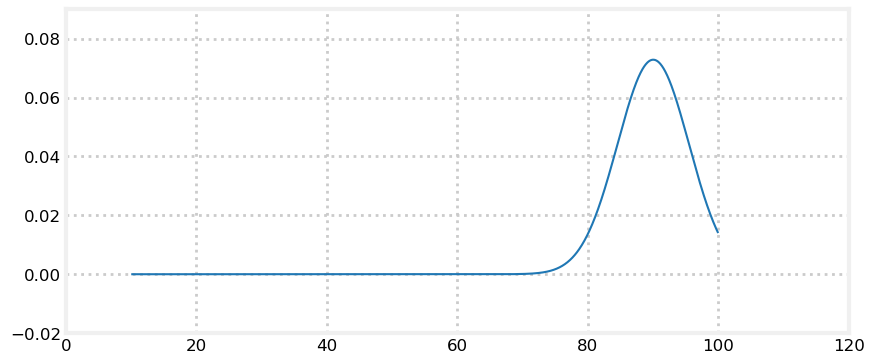

In [41]:
xs = np.arange(10, 100, 0.05)
ys = [gaussian(x, 90, 30) for x in xs]
plt.plot(xs, ys, label='var=0.2')
plt.xlim(0, 120)
plt.ylim(-0.02, 0.09);

曲线下的面积不能等于1，所以它不是概率分布。实际发生的情况是，比正态分布预测的更多的学生得分更接近范围的上限(例如)，而这条尾巴变得“胖”了。此外，该测试可能无法完美区分学生在技能上的细微差异，所以均值左侧的分布可能在某些地方有些扎堆。
 
传感器测量世界。传感器测量中的误差很少是真正的高斯分布。现在谈论这给卡尔曼滤波器设计者带来的困难还为时过早。值得记住的是，卡尔曼滤波数学是基于一个理想化的世界模型。现在，我将提供一些代码，我将在本书的后面使用这些代码来形成分布，以模拟各种进程和传感器。这个分布称为[*Student's $t$-distribution*](https://en.wikipedia.org/wiki/Student%27s_t-distribution)。
 
假设我想建模一个输出有白噪声的传感器。简单起见，假设信号是常数10，而噪声的标准差是2。我们可以使用函数`numpy.random.randn()`来获得一个均值为0，标准差为1的随机数。我可以用:

In [82]:
from numpy.random import randn
def sense():
    return 10 + randn()*2

让我们画出这个信号，看看它是什么样的。

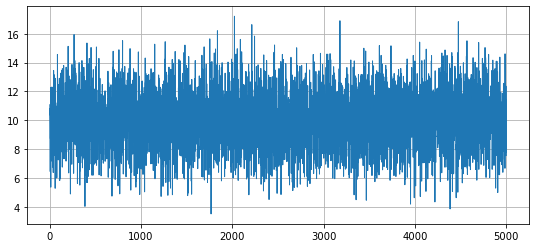

In [83]:
zs = [sense() for i in range(5000)]
plt.plot(zs, lw=1);

这和我想的一样。信号的中心在10点左右。标准差为2意味着68%的测量值将在$\pm$ 2(10)以内，99%将在$\pm$ 6(10)以内，这看起来就像正在发生的事情。
 
现在让我们看看由Student的$t$-分布生成的分布。我将不涉及数学，只是给你它的源代码，然后用它绘制一个分布。

In [84]:
import random
import math

def rand_student_t(df, mu=0, std=1):
    """return random number distributed by Student's t 
    distribution with `df` degrees of freedom with the 
    specified mean and standard deviation.
    """
    x = random.gauss(0, std)
    y = 2.0*random.gammavariate(0.5*df, 2.0)
    return x / (math.sqrt(y / df)) + mu

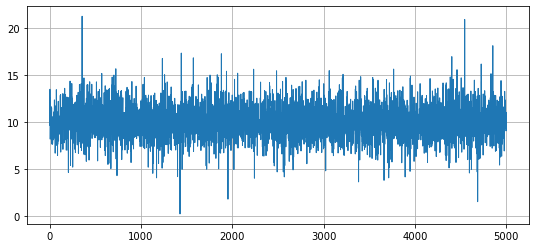

In [85]:
def sense_t():
    return 10 + rand_student_t(7)*2

zs = [sense_t() for i in range(5000)]
plt.plot(zs, lw=1);

从图中我们可以看到，虽然输出与正态分布相似，但也有离均值超过3个标准差的异常值(7到13)。
 
学生的$t$-分布不太可能是你的传感器(比如，GPS或多普勒)如何执行的精确模型，而且这不是一本关于如何建模物理系统的书。然而，当呈现真实世界的噪声时，它确实会产生合理的数据来测试您的过滤器的性能。在我们的模拟和测试中，我们将在书的其余部分使用这些分布。
 
这不是杞人忧天。卡尔曼滤波方程假设噪声是正态分布的，如果这不是真的，则执行次最优。任务关键型滤波器的设计人员，如航天器上的滤波器，需要掌握航天器上传感器性能的大量理论和经验知识。例如，我在NASA的一次任务中看到的一篇演讲说，虽然理论上说他们应该使用3个标准偏差来区分噪音和有效测量结果，但实际上他们必须使用5到6个标准偏差。这是他们通过实验确定的。

rand_student_t的代码包含在' filterpy.stats '中。 

```python
from filterpy.stats import rand_student_t
```
 
虽然我不会在这里讨论它，但统计学定义了描述概率分布形状的方法，即概率分布与指数分布的区别。正态分布是围绕平均值对称形成的，就像钟形曲线。然而，概率分布可能是不对称的。这个测量方法叫做[*skew*](https://en.wikipedia.org/wiki/Skewness)。尾巴可以变短、变胖、变薄，或者形状与指数分布不同。这种度量称为[*峰度*](https://en.wikipedia.org/wiki/Kurtosis)。“scipy。Stats '模块包含了' description '函数，用于计算这些统计数据。

In [86]:
import scipy
scipy.stats.describe(zs)

DescribeResult(nobs=5000, minmax=(0.23606481340309493, 21.281931411879995), mean=10.031572429243955, variance=2.847349580342699, skewness=0.13537406268524552, kurtosis=1.93949830888256)

让我们来看看两个正常的群体，一个小，一个大:

In [87]:
print(scipy.stats.describe(np.random.randn(10)))
print()
print(scipy.stats.describe(np.random.randn(300000)))

DescribeResult(nobs=10, minmax=(-1.612305407192634, 1.3993311044560806), mean=0.18368165685455, variance=1.0302338908047082, skewness=-0.3189528779904156, kurtosis=-1.00039757782245)

DescribeResult(nobs=300000, minmax=(-4.638869372819046, 4.74986868845982), mean=-0.0013202416761363633, variance=0.9991969257471748, skewness=0.0007986056292588667, kurtosis=0.003159950599910477)


小样本的偏度和峰度是非零的，因为小样本的数量不是很好地分布在0的均值附近。你也可以通过比较计算的平均值和方差与0和方差1的理论平均值来看出这一点。相比之下，大样本的均值和方差非常接近理论值，偏度和峰度都接近于零。

## 高斯乘积(可选)

读这部分并不重要。这里我导出了两个高斯乘积的方程。
你可以通过将两个高斯函数的方程相乘并结合各项来得到这个结果。代数运算很混乱。我将用贝叶斯定理来推导它。我们可以这样描述这个问题:假设先验为$N(\bar\mu， \bar\sigma^2)$，度量为$z \propto N(z， \sigma_z^2)$。给出z后验x是多少?

后验为$p(x \mid z)$。现在我们可以用贝叶斯定理来表述

$$p(x \mid z) = \frac{p(z \mid x)p(x)}{p(z)}$$

$p(z)$ 是一个标准化常数，所以我们可以创建一个比例关系

$$p(x \mid z) \propto p(z|x)p(x)$$

现在我们把高斯函数代入方程

$$p(z \mid x) = \frac{1}{\sqrt{2\pi\sigma_z^2}}\exp \Big[-\frac{(z-x)^2}{2\sigma_z^2}\Big]$$

$$p(x) = \frac{1}{\sqrt{2\pi\bar\sigma^2}}\exp \Big[-\frac{(x-\bar\mu)^2}{2\bar\sigma^2}\Big]$$

我们可以去掉前面的项，因为它们是常数

$$\begin{aligned}
p(x \mid z) &\propto \exp \Big[-\frac{(z-x)^2}{2\sigma_z^2}\Big]\exp \Big[-\frac{(x-\bar\mu)^2}{2\bar\sigma^2}\Big]\\
&\propto \exp \Big[-\frac{(z-x)^2}{2\sigma_z^2}-\frac{(x-\bar\mu)^2}{2\bar\sigma^2}\Big] \\
&\propto \exp \Big[-\frac{1}{2\sigma_z^2\bar\sigma^2}[\bar\sigma^2(z-x)^2+\sigma_z^2(x-\bar\mu)^2]\Big]
\end{aligned}$$

现在我们把平方项乘以后验 $x$.

$$\begin{aligned}
p(x \mid z) &\propto \exp \Big[-\frac{1}{2\sigma_z^2\bar\sigma^2}[\bar\sigma^2(z^2 -2xz + x^2) + \sigma_z^2(x^2 - 2x\bar\mu+\bar\mu^2)]\Big ] \\
&\propto \exp \Big[-\frac{1}{2\sigma_z^2\bar\sigma^2}[x^2(\bar\sigma^2+\sigma_z^2)-2x(\sigma_z^2\bar\mu + \bar\sigma^2z) + (\bar\sigma^2z^2+\sigma_z^2\bar\mu^2)]\Big ]
\end{aligned}$$

最后一个括号不包含后验$x$，因此可以将其视为常数而丢弃。

$$p(x \mid z) \propto \exp \Big[-\frac{1}{2}\frac{x^2(\bar\sigma^2+\sigma_z^2)-2x(\sigma_z^2\bar\mu + \bar\sigma^2z)}{\sigma_z^2\bar\sigma^2}\Big ]
$$

分子分母同时除以 $\bar\sigma^2+\sigma_z^2$ 得到

$$p(x \mid z) \propto \exp \Big[-\frac{1}{2}\frac{x^2-2x(\frac{\sigma_z^2\bar\mu + \bar\sigma^2z}{\bar\sigma^2+\sigma_z^2})}{\frac{\sigma_z^2\bar\sigma^2}{\bar\sigma^2+\sigma_z^2}}\Big ]
$$

比例性允许我们随意创建或删除常数，所以我们可以把它考虑进去

$$p(x \mid z) \propto \exp \Big[-\frac{1}{2}\frac{(x-\frac{\sigma_z^2\bar\mu + \bar\sigma^2z}{\bar\sigma^2+\sigma_z^2})^2}{\frac{\sigma_z^2\bar\sigma^2}{\bar\sigma^2+\sigma_z^2}}\Big ]
$$

高斯是

$$N(\mu,\, \sigma^2) \propto \exp\Big [-\frac{1}{2}\frac{(x - \mu)^2}{\sigma^2}\Big ]$$

我们可以看到$p(x \mid z)$的均值是

$$\mu_\mathtt{posterior} = \frac{\sigma_z^2\bar\mu + \bar\sigma^2z}{\bar\sigma^2+\sigma_z^2}$$

方差
$$
\sigma_\mathtt{posterior} = \frac{\sigma_z^2\bar\sigma^2}{\bar\sigma^2+\sigma_z^2}
$$
我去掉了常数，所以结果不是正常的，而是与1成比例的。贝叶斯定理用$p(z)$除数进行归一化，确保结果是正态的。我们在滤波器的更新步骤中进行归一化，确保滤波器估计为高斯分布。

$$\mathcal N_1 = \| \mathcal N_2\cdot \mathcal N_3\|$$

## 高斯和(可选)

同样，这一节也不重要。这里我导出了两个高斯函数的和的方程。

两个高斯函数的和由

$$\begin{gathered}\mu = \mu_1 + \mu_2 \\
\sigma^2 = \sigma^2_1 + \sigma^2_2
\end{gathered}$$
 
对此有几个证明。我将使用卷积因为我们在前一章中使用卷积来表示概率的直方图。
 
为了求两个高斯随机变量和的密度函数，我们对每个高斯随机变量的密度函数求和。它们是非线性的连续函数，所以我们需要用积分来计算它们的和。如果随机变量$p$和$z$(例如先验和度量)是独立的，我们可以用

$p(x) = \int\limits_{-\infty}^\infty f_p(x-z)f_z(z)\, dx$

这是卷积的方程。现在我们来做一些计算:

$p(x) = \int\limits_{-\infty}^\infty f_2(x-x_1)f_1(x_1)\, dx$

$=  \int\limits_{-\infty}^\infty 
\frac{1}{\sqrt{2\pi}\sigma_z}\exp\left[-\frac{(x - z - \mu_z)^2}{2\sigma^2_z}\right]
\frac{1}{\sqrt{2\pi}\sigma_p}\exp\left[-\frac{(x - \mu_p)^2}{2\sigma^2_p}\right] \, dx$

$=  \int\limits_{-\infty}^\infty
\frac{1}{\sqrt{2\pi}\sqrt{\sigma_p^2 + \sigma_z^2}} \exp\left[ -\frac{(x - (\mu_p + \mu_z)))^2}{2(\sigma_z^2+\sigma_p^2)}\right]
\frac{1}{\sqrt{2\pi}\frac{\sigma_p\sigma_z}{\sqrt{\sigma_p^2 + \sigma_z^2}}} \exp\left[ -\frac{(x - \frac{\sigma_p^2(x-\mu_z) + \sigma_z^2\mu_p}{}))^2}{2\left(\frac{\sigma_p\sigma_x}{\sqrt{\sigma_z^2+\sigma_p^2}}\right)^2}\right] \, dx$

$= \frac{1}{\sqrt{2\pi}\sqrt{\sigma_p^2 + \sigma_z^2}} \exp\left[ -\frac{(x - (\mu_p + \mu_z)))^2}{2(\sigma_z^2+\sigma_p^2)}\right] \int\limits_{-\infty}^\infty
\frac{1}{\sqrt{2\pi}\frac{\sigma_p\sigma_z}{\sqrt{\sigma_p^2 + \sigma_z^2}}} \exp\left[ -\frac{(x - \frac{\sigma_p^2(x-\mu_z) + \sigma_z^2\mu_p}{}))^2}{2\left(\frac{\sigma_p\sigma_x}{\sqrt{\sigma_z^2+\sigma_p^2}}\right)^2}\right] \, dx$

积分内的表达式是正态分布。正态分布的和是1，因此积分是1。这给了我们

$$p(x) = \frac{1}{\sqrt{2\pi}\sqrt{\sigma_p^2 + \sigma_z^2}} \exp\left[ -\frac{(x - (\mu_p + \mu_z)))^2}{2(\sigma_z^2+\sigma_p^2)}\right]$$

这是常态的形式

$$\begin{gathered}\mu_x = \mu_p + \mu_z \\
\sigma_x^2 = \sigma_z^2+\sigma_p^2\, \square\end{gathered}$$

## 总结与重点

这一章对统计学的介绍不够全面。我在书的其余部分只介绍了需要使用高斯函数的概念，没有更多。如果你打算阅读卡尔曼滤波的文献，我所介绍的内容不会让你走得太远。如果这对你来说是一个新话题，我建议你阅读统计学教科书。我一直很喜欢Schaum的自学系列，Alan Downey的*Think Stats*[5]也很好，可以在网上免费获得。

在我们继续之前，您必须了解以下几点:

* 正态分布表示一个连续的概率分布
* 它们完全由两个参数描述:均值($\mu$)和方差($\sigma^2$)
* $\mu$是所有可能值的平均值
* 方差$\sigma^2$表示我们的测量值与均值的差异
* 标准差($\sigma$)是方差($\sigma^2$)的平方根
* 自然界中很多东西都近似于正态分布，但数学上并不完美。
* 在过滤问题中，计算$p(x\mid z)$几乎是不可能的，但计算$p(z\mid x)$是直接的。让我们从后者中计算出前者。 

接下来的几章将使用高斯函数和贝叶斯定理来帮助执行滤波。正如上一节所指出的，高斯函数有时不能很好地描述世界。书的后一部分是专门用于过滤器，即使噪声或系统的行为是非高斯的。

## References

[1] https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/Supporting_Notebooks/Computing_and_plotting_PDFs.ipynb

[2] http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

[3] http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

[4] Huber, Peter J. *Robust Statistical Procedures*, Second Edition. Society for Industrial and Applied Mathematics, 1996.

[5] Downey, Alan. *Think Stats*, Second Edition. O'Reilly Media.

https://github.com/AllenDowney/ThinkStats2

http://greenteapress.com/thinkstats/

## Useful Wikipedia Links

https://en.wikipedia.org/wiki/Probability_distribution

https://en.wikipedia.org/wiki/Random_variable

https://en.wikipedia.org/wiki/Sample_space

https://en.wikipedia.org/wiki/Central_tendency

https://en.wikipedia.org/wiki/Expected_value

https://en.wikipedia.org/wiki/Standard_deviation

https://en.wikipedia.org/wiki/Variance

https://en.wikipedia.org/wiki/Probability_density_function

https://en.wikipedia.org/wiki/Central_limit_theorem

https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule

https://en.wikipedia.org/wiki/Cumulative_distribution_function

https://en.wikipedia.org/wiki/Skewness

https://en.wikipedia.org/wiki/Kurtosis